In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
#connect to SQLite and import data
conn=sqlite3.connect('/Users/kryst/Desktop/New Database/archive/sqlite-sakila.db')
df = pd.read_sql_query("Select DISTINCT f.title as film_title \
,f.rating \
,c.name as genre \
,c2.first_name || ' '|| c2.last_name as Customer_Name \
,r.rental_date as Rental_Date \
from film f \
left join film_category fc ON f.film_id = fc.film_id \
left join category c ON c.category_id = fc.category_id \
left join inventory i ON fc.film_id = i.film_id \
left join film_actor fa ON fa.film_id = f.film_id \
left join actor a2 ON a2.actor_id = fa.actor_id \
left join rental r ON r.inventory_id = i.inventory_id \
left join customer c2 ON r.customer_id = c2.customer_id ",conn)
conn.close()

In [3]:
#number of rows and columns
df.shape

(16087, 5)

In [4]:
#information about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   film_title     16087 non-null  object
 1   rating         16087 non-null  object
 2   genre          16087 non-null  object
 3   Customer_Name  16044 non-null  object
 4   Rental_Date    16044 non-null  object
dtypes: object(5)
memory usage: 628.5+ KB


# Top 5 genres 2005 & 2006

In [5]:
#convert dtype for rental_date to datetime 
df['Rental_Date'] = pd.to_datetime(df['Rental_Date'])

In [6]:
#sum null values
df.isnull().sum()

film_title        0
rating            0
genre             0
Customer_Name    43
Rental_Date      43
dtype: int64

In [7]:
#make a copy
df1 = df
df1

,film_title,rating,genre,Customer_Name,Rental_Date
0,ACADEMY DINOSAUR,PG,Documentary,JOEL FRANCISCO,2005-07-08 19:03:15
1,ACADEMY DINOSAUR,PG,Documentary,GABRIEL HARDER,2005-08-02 20:13:10
2,ACADEMY DINOSAUR,PG,Documentary,DIANNE SHELTON,2005-08-21 21:27:43
3,ACADEMY DINOSAUR,PG,Documentary,NORMAN CURRIER,2005-05-30 20:21:07
4,ACADEMY DINOSAUR,PG,Documentary,BEATRICE ARNOLD,2005-06-17 20:24:00
...,...,...,...,...,...
16082,ZORRO ARK,NC-17,Comedy,JESSIE BANKS,2005-05-29 03:49:03
16083,ZORRO ARK,NC-17,Comedy,JACKIE LYNCH,2005-06-15 21:50:32
16084,ZORRO ARK,NC-17,Comedy,MAUREEN LITTLE,2005-07-12 13:24:47
16085,ZORRO ARK,NC-17,Comedy,TONY CARRANZA,2005-07-31 07:32:21


In [8]:
#split rental_date to year
df1['RentalYear'] = df1['Rental_Date'].dt.strftime('%Y')

In [9]:
#export as csv
df1.to_csv('CustomerA.csv', index = False)

In [10]:
#drop rental_date from table
df2 = df1.drop(['Rental_Date'], axis = 1)
df2

,film_title,rating,genre,Customer_Name,RentalYear
0,ACADEMY DINOSAUR,PG,Documentary,JOEL FRANCISCO,2005
1,ACADEMY DINOSAUR,PG,Documentary,GABRIEL HARDER,2005
2,ACADEMY DINOSAUR,PG,Documentary,DIANNE SHELTON,2005
3,ACADEMY DINOSAUR,PG,Documentary,NORMAN CURRIER,2005
4,ACADEMY DINOSAUR,PG,Documentary,BEATRICE ARNOLD,2005
...,...,...,...,...,...
16082,ZORRO ARK,NC-17,Comedy,JESSIE BANKS,2005
16083,ZORRO ARK,NC-17,Comedy,JACKIE LYNCH,2005
16084,ZORRO ARK,NC-17,Comedy,MAUREEN LITTLE,2005
16085,ZORRO ARK,NC-17,Comedy,TONY CARRANZA,2005


In [11]:
#filter for 2005 only 
y1 = df2[df2['RentalYear'] == '2005']
y1

,film_title,rating,genre,Customer_Name,RentalYear
0,ACADEMY DINOSAUR,PG,Documentary,JOEL FRANCISCO,2005
1,ACADEMY DINOSAUR,PG,Documentary,GABRIEL HARDER,2005
2,ACADEMY DINOSAUR,PG,Documentary,DIANNE SHELTON,2005
3,ACADEMY DINOSAUR,PG,Documentary,NORMAN CURRIER,2005
4,ACADEMY DINOSAUR,PG,Documentary,BEATRICE ARNOLD,2005
...,...,...,...,...,...
16082,ZORRO ARK,NC-17,Comedy,JESSIE BANKS,2005
16083,ZORRO ARK,NC-17,Comedy,JACKIE LYNCH,2005
16084,ZORRO ARK,NC-17,Comedy,MAUREEN LITTLE,2005
16085,ZORRO ARK,NC-17,Comedy,TONY CARRANZA,2005


In [12]:
#genre by number of customers 
Y1 =pd.DataFrame(y1.groupby(['genre']).agg({'Customer_Name': 'count'}))
Y1

,Customer_Name
genre,
Action,1095
Animation,1145
Children,939
Classics,930
Comedy,932
Documentary,1044
Drama,1053
Family,1083
Foreign,1022


In [13]:
#rename column 
Y1 = Y1.rename(columns = {'Customer_Name':'Number_of_Rentals_2005'})
Y1

,Number_of_Rentals_2005
genre,
Action,1095
Animation,1145
Children,939
Classics,930
Comedy,932
Documentary,1044
Drama,1053
Family,1083
Foreign,1022


In [14]:
#sort by top 5 
YY1= Y1.sort_values('Number_of_Rentals_2005', ascending= False)
YYY1=YY1.head()

In [15]:
#filter table for 2006 only
y2 = df2[df2['RentalYear'] == '2006']
y2

,film_title,rating,genre,Customer_Name,RentalYear
25,ACE GOLDFINGER,G,Horror,BRANDON HUEY,2006
62,AFFAIR PREJUDICE,G,Horror,CARMEN OWENS,2006
77,AFRICAN EGG,G,Family,SETH HANNON,2006
225,ALI FOREVER,PG,Horror,TRACY COLE,2006
264,ALONE TRIP,R,Music,MARCIA DEAN,2006
...,...,...,...,...,...
15658,WILD APOLLO,R,New,NAOMI JENNINGS,2006
15701,WINDOW SIDE,R,Travel,JEREMY HURTADO,2006
15788,WOMEN DORADO,R,Action,NATALIE MEYER,2006
15930,WORLD LEATHERNECKS,PG-13,Horror,NEIL RENNER,2006


In [16]:
#genre by number of customers
Y2 =pd.DataFrame(y2.groupby(['genre']).agg({'Customer_Name': 'count'}))
Y2

,Customer_Name
genre,
Action,17
Animation,21
Children,6
Classics,9
Comedy,9
Documentary,6
Drama,7
Family,13
Foreign,11


In [17]:
#rename column
Y2 = Y2.rename(columns = {'Customer_Name':'Number_of_Rentals_2006'})
Y2

,Number_of_Rentals_2006
genre,
Action,17
Animation,21
Children,6
Classics,9
Comedy,9
Documentary,6
Drama,7
Family,13
Foreign,11


In [18]:
#sort by top 5 
YY2= Y2.sort_values('Number_of_Rentals_2006', ascending= False)
YYY2= YY2.head()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Sports'),
  Text(3, 0, 'Games'),
  Text(4, 0, 'Family')])

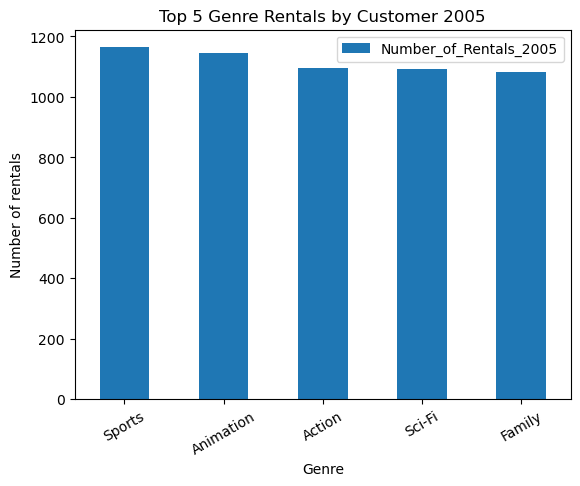

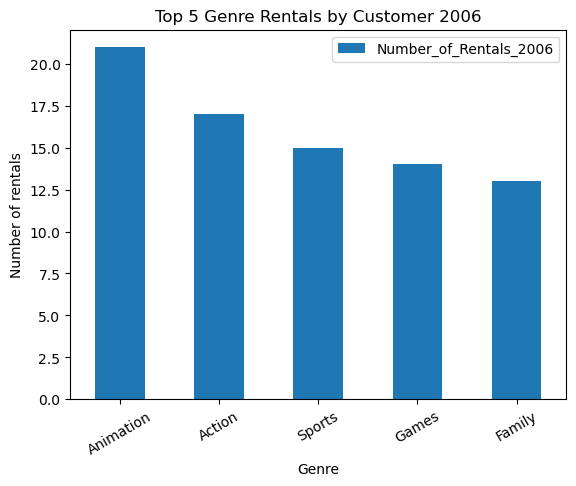

In [19]:
#bar charts 
YYY1.plot(kind='bar')
plt.title('Top 5 Genre Rentals by Customer 2005')
plt.xlabel('Genre')
plt.ylabel('Number of rentals')
plt.xticks(rotation=30, horizontalalignment="center")

YYY2.plot(kind='bar')
plt.title('Top 5 Genre Rentals by Customer 2006')
plt.xlabel('Genre')
plt.ylabel('Number of rentals')
plt.xticks(rotation=30, horizontalalignment="center")

# Top 5 Movie Rating Rented 2005 & 2006

In [20]:
#make a copy
df3 = df1

In [21]:
#filter for 2005 only 
DF3 = df3[df3['RentalYear'] == '2005']


In [22]:
#rating by year and customer count
R =pd.DataFrame(DF3.groupby(['RentalYear','rating']).agg({'Customer_Name': 'count'}))
R

Customer_Name
RentalYear rating               
2005       G                2740
           NC-17            3249
           PG               3178
           PG-13            3543
           R                3152

In [23]:
#rename column 
R1 = R.rename(columns = {'Customer_Name':'Number_of_Rentals'})
R1

Number_of_Rentals
RentalYear rating                   
2005       G                    2740
           NC-17                3249
           PG                   3178
           PG-13                3543
           R                    3152

In [24]:
#sort values
r1 = R1.sort_values('Number_of_Rentals', ascending = False)
r1

Number_of_Rentals
RentalYear rating                   
2005       PG-13                3543
           NC-17                3249
           PG                   3178
           R                    3152
           G                    2740

In [25]:
#filter for 2006 only 
DF4 = df3[df3['RentalYear'] == '2006']


In [26]:
#rating  by year and customer count
R3 =pd.DataFrame(DF4.groupby(['RentalYear','rating']).agg({'Customer_Name': 'count'}))
R3

Customer_Name
RentalYear rating               
2006       G                  33
           NC-17              44
           PG                 34
           PG-13              42
           R                  29

In [27]:
#rename column 
R4 = R3.rename(columns = {'Customer_Name':'Number_of_Rentals'})
R4

Number_of_Rentals
RentalYear rating                   
2006       G                      33
           NC-17                  44
           PG                     34
           PG-13                  42
           R                      29

Text(0.5, 1.0, 'Top 5 Movie Rating Rentals 2006')

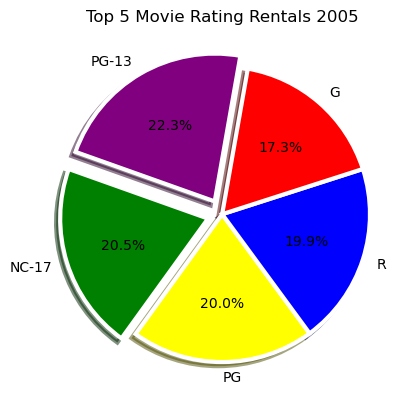

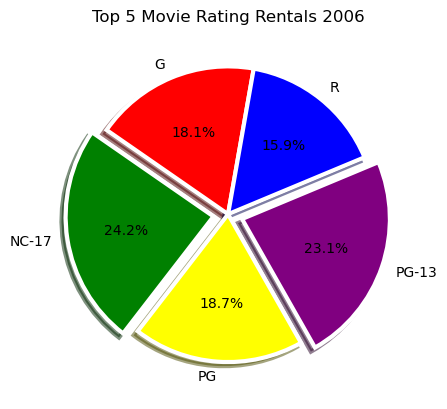

In [28]:
#Visualize tables using pie charts


labels = 'PG-13', 'NC-17','PG','R', 'G'
sizes = [3543,3249,3178,3152,2740]
 
fig1, ax1 = plt.subplots()
explode = (0.1, 0.1, 0, 0, 0) 
colors = ['purple','green','yellow','blue','red']
ax1.pie(sizes, explode=explode, labels=labels, colors = colors,autopct='%1.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
shadow=True, startangle=80)
plt.title('Top 5 Movie Rating Rentals 2005') 

labels = 'G', 'NC-17','PG','PG-13', 'R'
sizes = [33,44,34,42,29]
 
fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0.1, 0) 
colors = ['red','green','yellow','purple','blue']
ax1.pie(sizes, explode=explode, labels=labels, colors = colors,autopct='%1.1f%%',
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},shadow=True, startangle=80)
plt.title('Top 5 Movie Rating Rentals 2006') 




# Additional analysis

In [29]:
#connect to SQLite and import data
conn=sqlite3.connect('/Users/kryst/Desktop/New Database/archive/sqlite-sakila.db')
new = pd.read_sql_query("Select c3.country \
,c.active \
, c4.name as Genre \
, p.amount as Price \
, r.rental_date \
, r.return_date \
, f.replacement_cost \
From payment p \
left join rental r on r.rental_id = p.rental_id \
left join customer c on c.customer_id = p.customer_id \
left join address a on a.address_id = c.address_id \
left join city c2 on c2.city_id = a.city_id \
left join country c3 on c2.country_id = c3.country_id \
left join inventory i on i.inventory_id = r.inventory_id \
left join film_category fc on fc.film_id = i.film_id \
left join film f on f.film_id  = fc.film_id \
left join category c4 on c4.category_id = fc.category_id", conn)
conn.close()
new

,country,active,Genre,Price,rental_date,return_date,replacement_cost
0,Japan,1,Classics,2.99,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000,29.99
1,Japan,1,Sports,0.99,2005-05-28 10:35:23.000,2005-06-03 06:32:23.000,9.99
2,Japan,1,Classics,5.99,2005-06-15 00:54:12.000,2005-06-23 02:42:12.000,17.99
3,Japan,1,Classics,0.99,2005-06-15 18:02:53.000,2005-06-19 15:54:53.000,16.99
4,Japan,1,Comedy,9.99,2005-06-15 21:08:46.000,2005-06-25 02:26:46.000,13.99
...,...,...,...,...,...,...,...
16044,China,1,Comedy,4.99,2005-08-21 17:43:42.000,2005-08-22 18:53:42.000,18.99
16045,China,1,Classics,1.99,2005-08-21 21:41:57.000,2005-08-25 20:37:57.000,13.99
16046,China,1,Horror,8.99,2005-08-23 06:09:44.000,2005-09-01 06:53:44.000,13.99
16047,China,1,Action,2.99,2005-08-23 11:08:46.000,2005-08-25 07:25:46.000,22.99


In [30]:
#check data information
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16049 entries, 0 to 16048
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           16049 non-null  object 
 1   active            16049 non-null  object 
 2   Genre             16044 non-null  object 
 3   Price             16049 non-null  float64
 4   rental_date       16044 non-null  object 
 5   return_date       15861 non-null  object 
 6   replacement_cost  16044 non-null  float64
dtypes: float64(2), object(5)
memory usage: 877.8+ KB


In [31]:
#convert dtype for rental_date to datetime 
new['rental_date'] = pd.to_datetime(new['rental_date'])

In [32]:
#convert dtype for rental_date to datetime 
new['return_date'] = pd.to_datetime(new['return_date'])

In [33]:
#confirm conversions 
new.dtypes

country                     object
active                      object
Genre                       object
Price                      float64
rental_date         datetime64[ns]
return_date         datetime64[ns]
replacement_cost           float64
dtype: object

In [34]:
#calculate length of time between rental & return date
new['Duration'] = new['return_date'] - new['rental_date']
new

,country,active,Genre,Price,rental_date,return_date,replacement_cost,Duration
0,Japan,1,Classics,2.99,2005-05-25 11:30:37,2005-06-03 12:00:37,29.99,9 days 00:30:00
1,Japan,1,Sports,0.99,2005-05-28 10:35:23,2005-06-03 06:32:23,9.99,5 days 19:57:00
2,Japan,1,Classics,5.99,2005-06-15 00:54:12,2005-06-23 02:42:12,17.99,8 days 01:48:00
3,Japan,1,Classics,0.99,2005-06-15 18:02:53,2005-06-19 15:54:53,16.99,3 days 21:52:00
4,Japan,1,Comedy,9.99,2005-06-15 21:08:46,2005-06-25 02:26:46,13.99,9 days 05:18:00
...,...,...,...,...,...,...,...,...
16044,China,1,Comedy,4.99,2005-08-21 17:43:42,2005-08-22 18:53:42,18.99,1 days 01:10:00
16045,China,1,Classics,1.99,2005-08-21 21:41:57,2005-08-25 20:37:57,13.99,3 days 22:56:00
16046,China,1,Horror,8.99,2005-08-23 06:09:44,2005-09-01 06:53:44,13.99,9 days 00:44:00
16047,China,1,Action,2.99,2005-08-23 11:08:46,2005-08-25 07:25:46,22.99,1 days 20:17:00


In [35]:
#check for null values , confirm there are movies not returned
new.isnull().sum()

country               0
active                0
Genre                 5
Price                 0
rental_date           5
return_date         188
replacement_cost      5
Duration            188
dtype: int64

In [36]:
#export as csv
new.to_csv('Customer2.csv', index = False)

In [37]:
new

,country,active,Genre,Price,rental_date,return_date,replacement_cost,Duration
0,Japan,1,Classics,2.99,2005-05-25 11:30:37,2005-06-03 12:00:37,29.99,9 days 00:30:00
1,Japan,1,Sports,0.99,2005-05-28 10:35:23,2005-06-03 06:32:23,9.99,5 days 19:57:00
2,Japan,1,Classics,5.99,2005-06-15 00:54:12,2005-06-23 02:42:12,17.99,8 days 01:48:00
3,Japan,1,Classics,0.99,2005-06-15 18:02:53,2005-06-19 15:54:53,16.99,3 days 21:52:00
4,Japan,1,Comedy,9.99,2005-06-15 21:08:46,2005-06-25 02:26:46,13.99,9 days 05:18:00
...,...,...,...,...,...,...,...,...
16044,China,1,Comedy,4.99,2005-08-21 17:43:42,2005-08-22 18:53:42,18.99,1 days 01:10:00
16045,China,1,Classics,1.99,2005-08-21 21:41:57,2005-08-25 20:37:57,13.99,3 days 22:56:00
16046,China,1,Horror,8.99,2005-08-23 06:09:44,2005-09-01 06:53:44,13.99,9 days 00:44:00
16047,China,1,Action,2.99,2005-08-23 11:08:46,2005-08-25 07:25:46,22.99,1 days 20:17:00
